In [1]:
# remove warning note
import os
os.environ["OMP_NUM_THREADS"] = "1"

##  Initial data inspection and data cleaning:

In [3]:
# Load pandas library
import pandas as pd

# Load the dataset
df = pd.read_csv("rolling_stones_spotify.csv")

# Look at data structure
print(df)

      Unnamed: 0                         name               album  \
0              0   Concert Intro Music - Live  Licked Live In NYC   
1              1   Street Fighting Man - Live  Licked Live In NYC   
2              2           Start Me Up - Live  Licked Live In NYC   
3              3  If You Can't Rock Me - Live  Licked Live In NYC   
4              4            Don’t Stop - Live  Licked Live In NYC   
...          ...                          ...                 ...   
1605        1605                        Carol  The Rolling Stones   
1606        1606                      Tell Me  The Rolling Stones   
1607        1607          Can I Get A Witness  The Rolling Stones   
1608        1608   You Can Make It If You Try  The Rolling Stones   
1609        1609              Walking The Dog  The Rolling Stones   

     release_date  track_number                      id  \
0      2022-06-10             1  2IEkywLJ4ykbhi1yRQvmsT   
1      2022-06-10             2  6GVgVJBKkGJoRfarYRvG

In [5]:
# look at first 3 rows 
df.head(3)

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400,0.956,-4.936,0.1150,130.066,0.3130,34,263160


In [7]:
# Find the number of duplicate rows
df.duplicated().sum()

0

In [9]:
# review the number of missing rows in each column
df.isnull().sum()

Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [11]:
# Overview the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   int64  


## Refine the data for further processing 

In [13]:
print(df.columns.tolist())

['Unnamed: 0', 'name', 'album', 'release_date', 'track_number', 'id', 'uri', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity', 'duration_ms']


In [15]:
print(df.shape  )

(1610, 18)


In [17]:
# remove the two columns ( "Unnamed: 0", "uri") which are not useful to data analysis. 

df = df.drop(columns = ["Unnamed: 0", "uri"])
df.shape     

(1610, 16)

In [19]:
# remove duplicates from the "id" column. 
df = df.drop_duplicates(subset = "id")
df.shape

(1610, 16)

In [21]:
# get datetime from the "release_date" column
df["release_date"]  = pd.to_datetime(df["release_date"], errors = "coerce", format = "%Y-%m-%d")
df.head(2)

,name,album,release_date,track_number,id,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233,0.961,-4.803,0.0759,131.455,0.3180,34,253173


In [23]:
# is there any missing value in the "release_date" column left
df["release_date"].isnull().sum()


0

## Perform exploratory data analysis and feature engineering

In [28]:
# a.	Utilize suitable visualizations to identify the two albums that should be recommended to anyone based on the number of popular 
#     songs in each album

In [25]:
print(df.columns)

Index(['name', 'album', 'release_date', 'track_number', 'id', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'popularity', 'duration_ms'],
      dtype='object')


In [27]:
# take "popularity" > 40 (assume) for popular songs in each album
popular_songs_each_album = df[df["popularity"] >= 40]
display(popular_songs_each_album.shape)

(119, 16)



album
Exile On Main Street (2010 Re-Mastered)    14
Sticky Fingers (Remastered)                10
Some Girls                                  8
Let It Bleed                                8
Tattoo You (2009 Re-Mastered)               7
Name: name, dtype: int64
album
Exile On Main Street (2010 Re-Mastered)    14
Sticky Fingers (Remastered)                10
Name: name, dtype: int64


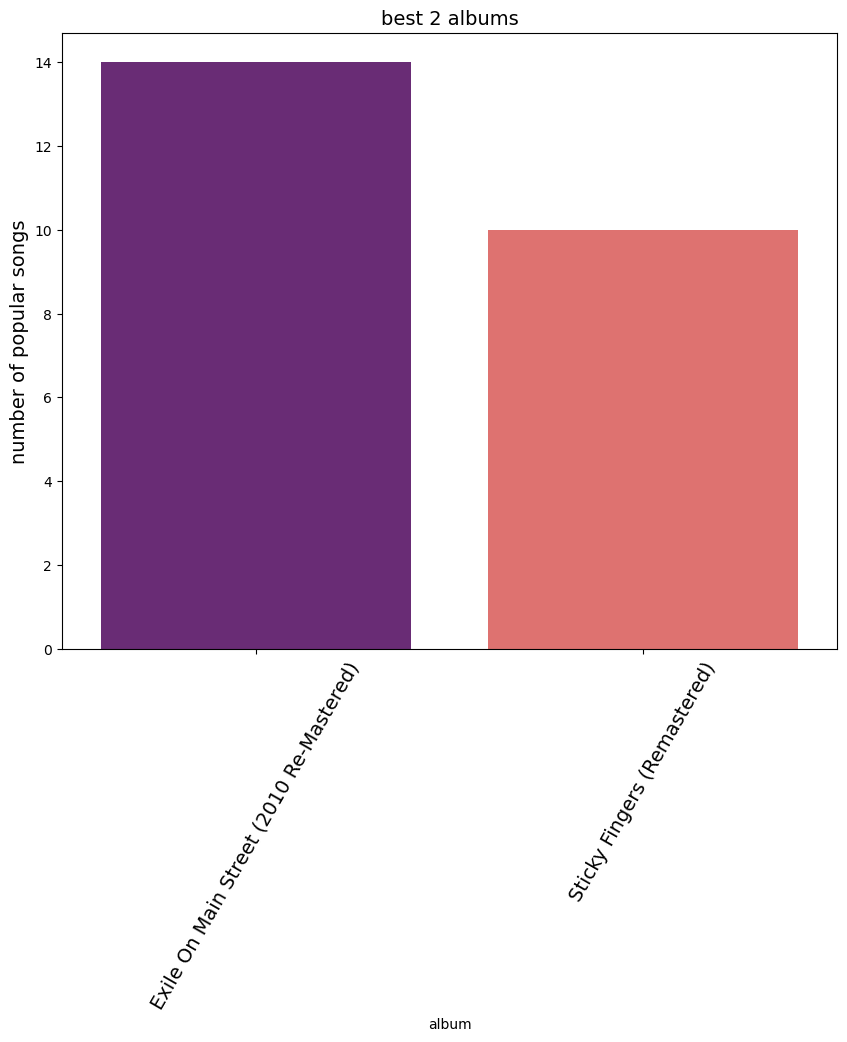

In [29]:
import matplotlib.pyplot as plt

import seaborn as sns

# Find the number of popular songs in each album

# ["name"] is used to count the number of somgss
popular_song_groups = popular_songs_each_album.groupby("album")["name"]
print(popular_song_groups)

print("\n")

numbe_popular_songs = popular_song_groups.count().sort_values(ascending = False)
print(numbe_popular_songs.head())

# See two albumss (top)

top_two_alubums = numbe_popular_songs.head(2)
print(top_two_alubums)

# plot
plt.figure(figsize=(10, 8))

sns.barplot(x = top_two_alubums.index, y = top_two_alubums.values, hue = top_two_alubums.index, palette = "magma")

plt.ylabel("number of popular songs", fontsize = 14)

plt.xticks(rotation = 60, fontsize = 14)

plt.title("best 2 albums", fontsize = 14)

plt.show()


In [35]:
# Conduct exploratory data analysis to explore into various features of songs, aiming to identify patterns

[(0, 'acousticness'), (1, 'danceability'), (2, 'energy'), (3, 'instrumentalness'), (4, 'liveness'), (5, 'speechiness'), (6, 'valence')]


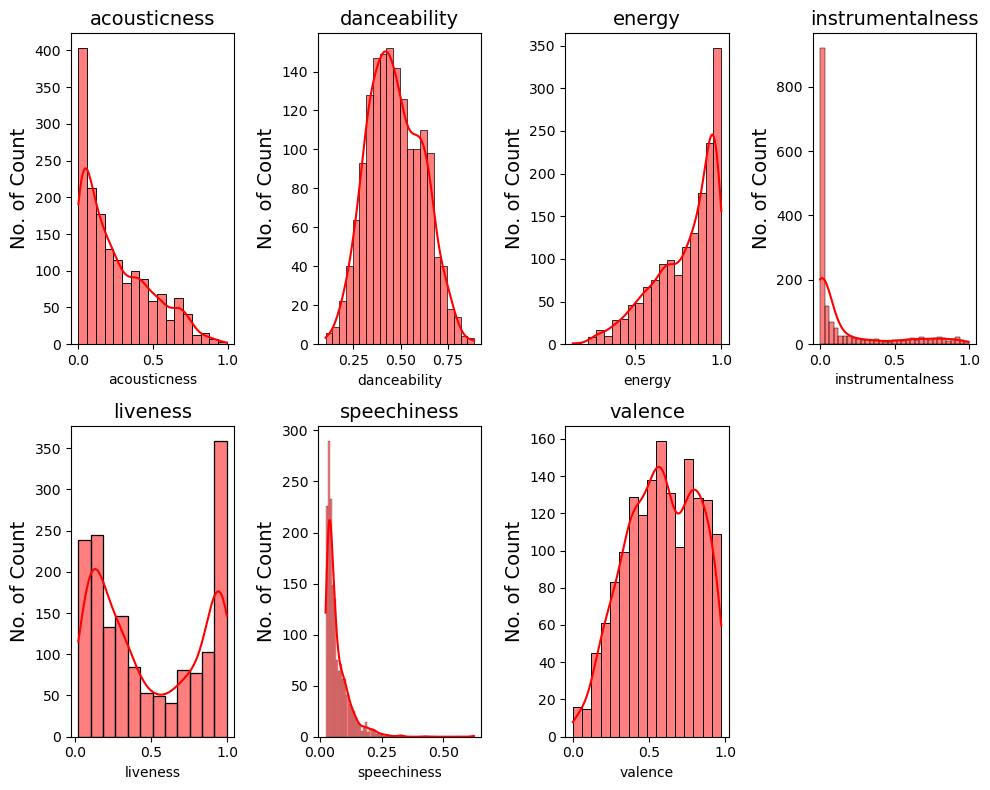

In [31]:
main_features = [  'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'speechiness', 'valence']

print(list(enumerate(main_features)))

# plot
plt.figure(figsize=(10, 8))

for feature_number, feature_song  in enumerate(main_features):
    plt.subplot(2, 4, feature_number + 1)               # 2 rows and 4 columns, first feature number index = 0
    sns.histplot(df[feature_song], kde = True, color = "red")
    plt.title(feature_song, fontsize = 14)
    plt.ylabel("No. of Count", fontsize = 14)

plt.tight_layout()

plt.show()


In [37]:
# Examine the relationship between a song's popularity and various factors, exploring how this 
#  correlation has evolved

In [33]:
import numpy as np
# take numeric columns
df_numeric_columns = df.select_dtypes(include = [np.number])   # see only numeric columns
df_numeric_columns.head(2)


,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,1,0.0824,0.463,0.993,0.996,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,2,0.4370,0.326,0.965,0.233,0.961,-4.803,0.0759,131.455,0.3180,34,253173


Text(0.5, 1.0, "correlation between a song's popularity and various factors")

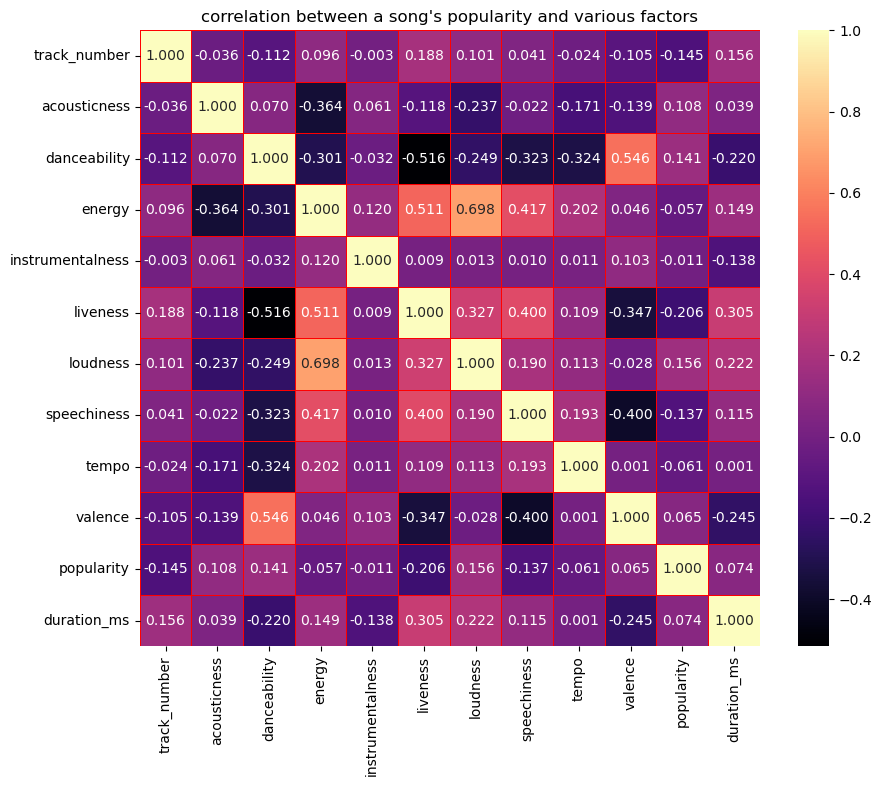

In [35]:
# correlation between a song's popularity and various factors
plt.figure(figsize=(10, 8))

sns.heatmap(df_numeric_columns.corr(), annot = True, fmt = ".3f", linewidths = 0.4, linecolor = "red", cmap = "magma")

plt.title("correlation between a song's popularity and various factors")


In [37]:
# find the correlation for variou features

correlation = df_numeric_columns.corr()

correlation

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
track_number,1.000000,-0.035675,-0.112004,0.096314,-0.002772,0.188351,0.100835,0.040617,-0.023934,-0.104567,-0.145115,0.156455
acousticness,-0.035675,1.000000,0.070017,-0.363819,0.061403,-0.117739,-0.237083,-0.021774,-0.171003,-0.138803,0.108046,0.039128
danceability,-0.112004,0.070017,1.000000,-0.300536,-0.031812,-0.516387,-0.249406,-0.322684,-0.324398,0.546210,0.141205,-0.220045
energy,0.096314,-0.363819,-0.300536,1.000000,0.120261,0.511188,0.698039,0.417214,0.201885,0.046217,-0.057272,0.148876
instrumentalness,-0.002772,0.061403,-0.031812,0.120261,1.000000,0.008873,0.012524,0.009586,0.010961,0.103480,-0.010612,-0.137599
liveness,0.188351,-0.117739,-0.516387,0.511188,0.008873,1.000000,0.327036,0.400018,0.108855,-0.347451,-0.205845,0.304735
loudness,0.100835,-0.237083,-0.249406,0.698039,0.012524,0.327036,1.000000,0.189904,0.112837,-0.027571,0.156323,0.221558
speechiness,0.040617,-0.021774,-0.322684,0.417214,0.009586,0.400018,0.189904,1.000000,0.192687,-0.399751,-0.136745,0.114546
tempo,-0.023934,-0.171003,-0.324398,0.201885,0.010961,0.108855,0.112837,0.192687,1.000000,0.000558,-0.061061,0.001465
valence,-0.104567,-0.138803,0.546210,0.046217,0.103480,-0.347451,-0.027571,-0.399751,0.000558,1.000000,0.065333,-0.244833


In [39]:
# Find correlation of popularity with numeric features

correlation_popularity_numeric_featurers = correlation["popularity"].sort_values(ascending = False)

print(correlation_popularity_numeric_featurers)


popularity          1.000000
loudness            0.156323
danceability        0.141205
acousticness        0.108046
duration_ms         0.074102
valence             0.065333
instrumentalness   -0.010612
energy             -0.057272
tempo              -0.061061
speechiness        -0.136745
track_number       -0.145115
liveness           -0.205845
Name: popularity, dtype: float64


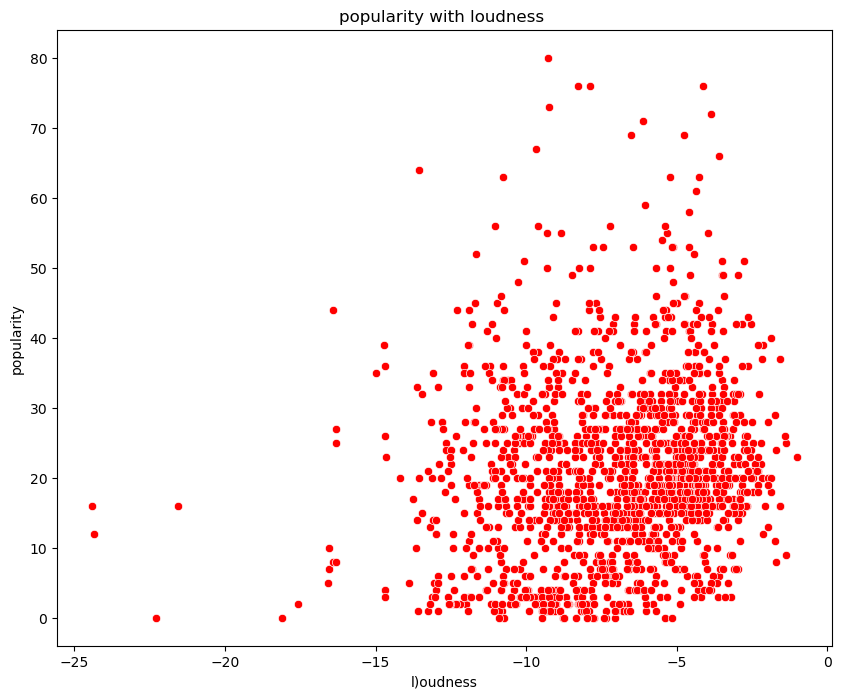

In [41]:
# plot for high correlationss

plt.figure(figsize=(10, 8))

sns.scatterplot(data = df, x = "loudness", y = "popularity", color = "red")
plt.title( "popularity with loudness ")
plt.xlabel("l)oudness")
plt.ylabel("popularity")

plt.show()

In [52]:
# d.	Provide insights on the significance of dimensionality reduction techniques. Share your ideas and elucidate your observations

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


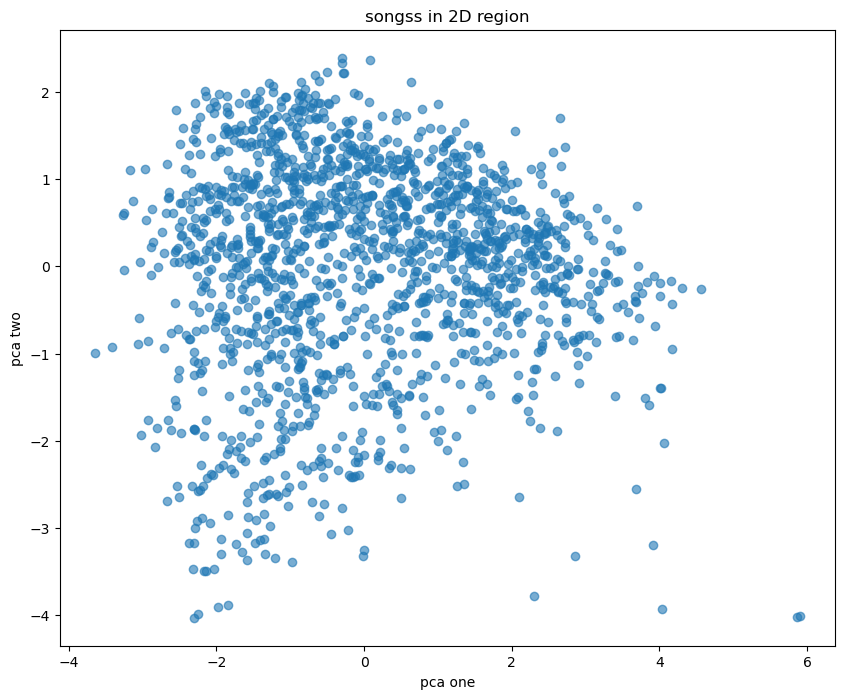

In [45]:
numeric_featurers_cluster = [ 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'speechiness', 'tempo', 'valence', 'popularity']

# scale featurer
standard_scaler =  StandardScaler()

scaled_data = standard_scaler.fit_transform(df[numeric_featurers_cluster])
# print(scaled_data )

# use PCA for visualization

pca_visualization = PCA(n_components = 2)
pca_visualization_fit_data = pca_visualization.fit_transform(scaled_data)

plt.figure(figsize=(10, 8))

plt.scatter(pca_visualization_fit_data[:, 0], pca_visualization_fit_data[:, 1], alpha = 0.6)

plt.xlabel("pca one")

plt.ylabel("pca two")

plt.title("songss in 2D region")

plt.show()


## Perform cluster analysis

In [68]:
# Identify the right number of clusters

In [47]:
numeric_featurers_cluster = [ 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'speechiness', 'tempo', 'valence', 'popularity']

# scale featurer
standard_scaler =  StandardScaler()

scaled_data = standard_scaler.fit_transform(df[numeric_featurers_cluster])
# print(scaled_data )

[0.204175550495231, 0.19188071558303424, 0.1464192907512448, 0.13591732840905557, 0.14565138285187612, 0.15647373828012628, 0.15673537753161265, 0.16822994730602384, 0.16104259926243183, 0.15401930267386882]


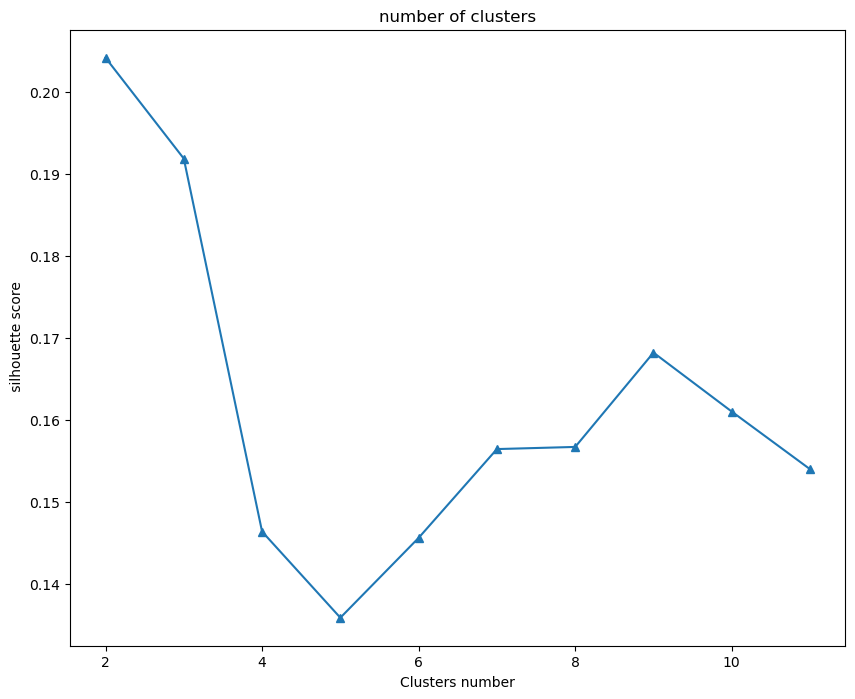

In [49]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []

clusters_range = range(2, 12)

for i in clusters_range:
    k_means = KMeans(n_clusters = i, random_state = 42)
    k_means_fit = k_means.fit_predict(scaled_data)
    scores = silhouette_score(scaled_data, k_means_fit )
    silhouette_scores.append(scores)

print(silhouette_scores)


#  plot
plt.figure(figsize=(10, 8))
plt.plot(clusters_range ,  silhouette_scores, marker = "^")
plt.xlabel("Clusters number")
plt.ylabel(" silhouette score")
plt.title("number of clusters")
plt.show()

In [230]:
# Use appropriate clustering algorithms to find cluster centers

In [51]:
# take clusters # = 2
k = 2

K_Means = KMeans(n_clusters = k, random_state = 123)

df["num_clusters"] = K_Means.fit_predict(scaled_data)

# look at cluster centers
two_cluster_centers = standard_scaler.inverse_transform(K_Means.cluster_centers_)
#print(two_cluster_centers)

# make dataframe

two_cluster_centers_df = pd.DataFrame(two_cluster_centers, columns = numeric_featurers_cluster)

print(two_cluster_centers_df)

   acousticness  danceability    energy  instrumentalness  liveness  \
0      0.194795      0.364251  0.907984          0.160946  0.805967   
1      0.290774      0.544572  0.708662          0.166503  0.264294   

   speechiness       tempo   valence  popularity  
0     0.101303  136.019368  0.461693   17.087278  
1     0.046503  118.889700  0.669360   23.466809  


In [ ]:
# c.	Define each cluster based on the features

              acousticness  danceability    energy  instrumentalness  \
num_clusters                                                           
0                 0.195024      0.364264  0.908003          0.161185   
1                 0.290506      0.544370  0.708861          0.166325   

              liveness  speechiness       tempo   valence  popularity  
num_clusters                                                           
0             0.806963     0.101351  136.064887  0.461620   17.093333  
1             0.264155     0.046527  118.875159  0.669191   23.455615  


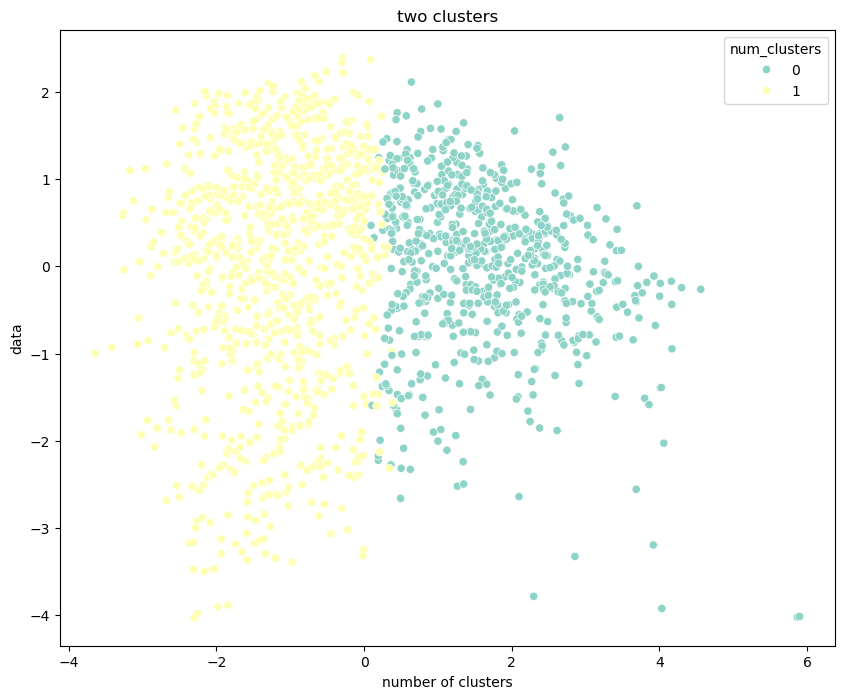

In [53]:
df["num_clusters"].value_counts()

average_cluster = df.groupby("num_clusters")[numeric_featurers_cluster].mean()

print(average_cluster)

# plot
plt.figure(figsize = (10, 8))
sns.scatterplot(x = pca_visualization_fit_data[:, 0], y = pca_visualization_fit_data[:, 1], hue = df["num_clusters"], palette = "Set3")
plt.title("two clusters")
plt.xlabel("number of clusters")
plt.ylabel("data")
plt.show()